### Build a Sequential Neural Network using the familiar Census Data

In [85]:
import keras
import tensorflow
import pandas as pd
from sklearn.svm import SVC
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

### 1. Import the now (very) familiar US Census Income Data

In [86]:
col_names = [
    "Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
    "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
    "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"]

df = pd.read_csv('adult.data')
df.columns=col_names

df['Income'] = df['Income'].apply(lambda x: 0 if x == ' <=50K' else 1)
for column in df.columns:
    if df[column].dtype == type(object):
        le = sklearn.preprocessing.LabelEncoder()
        df[column] = le.fit_transform(df[column])
        
df.tail()

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0
32559,52,5,287927,11,9,2,4,5,4,0,15024,0,40,39,1


In [87]:
df = df.dropna()
df.tail()

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0
32559,52,5,287927,11,9,2,4,5,4,0,15024,0,40,39,1


### 2. Split the data and use preprocessing StandardScaler on the data

In [88]:
X = df.drop(columns='Income')
X = pd.DataFrame(preprocessing.StandardScaler().fit_transform(X), columns=X.columns)
y = df['Income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=555, stratify=y)

### 3. Use the Tensorflow and Keras libraries from last week to build a NN.

*Use today's class notes as a guild.  Try using different activation functions

In [89]:
nn_X_train = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
nn_X_test = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))

In [90]:
# create model
mdl_k = tf.keras.Sequential([tf.keras.layers.Input(shape=(nn_X_train.shape[1], nn_X_train.shape[2]))])
mdl_k.add(tf.keras.layers.Dense(12, input_dim=3, activation='relu', kernel_initializer="he_normal"))
# mdl_k.add(tf.keras.layers.Dense(8, activation='relu'))

mdl_k.add(tf.keras.layers.LSTM(64))
#mdl_k.add(tf.keras.layers.LeakyReLU(alpha=0.2))
mdl_k.add(tf.keras.layers.Dense(1, activation='relu'))

In [91]:
# Compile model
mdl_k.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])

In [92]:
mdl_k.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 14, 12)            24        
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                19712     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 19,801
Trainable params: 19,801
Non-trainable params: 0
_________________________________________________________________


In [96]:
val_dataset = tf.data.Dataset.from_tensor_slices((nn_X_test, y_test)).batch(batch_size=128)

In [97]:
history = mdl_k.fit(
    nn_X_train,
    y_train,
    epochs=50,
    batch_size=128,
    # validation_data=(nn_X_test, y_test),
    validation_data=val_dataset,
    #validation_split=0.1,
#     callbacks=[
#         tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min", verbose=2)
#     ],
    use_multiprocessing=True
)

Epoch 1/50
204/204 [==============================] - 11s 31ms/step - loss: 0.1599 - accuracy: 0.7803 - val_loss: 0.1327 - val_accuracy: 0.8091
Epoch 2/50
204/204 [==============================] - 5s 26ms/step - loss: 0.1320 - accuracy: 0.8105 - val_loss: 0.1243 - val_accuracy: 0.8180
Epoch 3/50
204/204 [==============================] - 4s 22ms/step - loss: 0.1210 - accuracy: 0.8224 - val_loss: 0.1194 - val_accuracy: 0.8292
Epoch 4/50
204/204 [==============================] - 4s 21ms/step - loss: 0.1204 - accuracy: 0.8242 - val_loss: 0.1158 - val_accuracy: 0.8323
Epoch 5/50
204/204 [==============================] - 5s 22ms/step - loss: 0.1146 - accuracy: 0.8389 - val_loss: 0.1167 - val_accuracy: 0.8308
Epoch 6/50
204/204 [==============================] - 5s 24ms/step - loss: 0.1125 - accuracy: 0.8395 - val_loss: 0.1113 - val_accuracy: 0.8404
Epoch 7/50
204/204 [==============================] - 5s 23ms/step - loss: 0.1101 - accuracy: 0.8413 - val_loss: 0.1099 - val_accuracy: 0.836

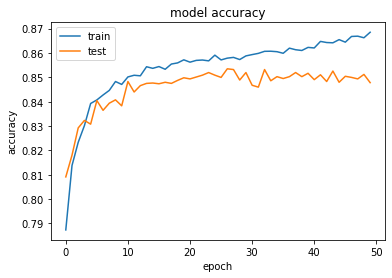

In [114]:
import matplotlib.pyplot as plt
%matplotlib inline
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.rcParams['figure.figsize'] = [10, 10]

### 4. Build an xgBoost model on this data.  Were you able to build a NN with greater accuracy than xgBoost ?

In [102]:
model = xgb.XGBClassifier(random_state = 1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy Score", accuracy_score(y_test, y_pred))

[20:58:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score 0.8697788697788698


In [1]:
'No I did not. The NN accuracy score of 0.8478 is lower than the xgBoost score of 0.8698.'

'No I did not. The NN accuracy score of 0.8478 is lower than the xgBoost score of 0.8698.'